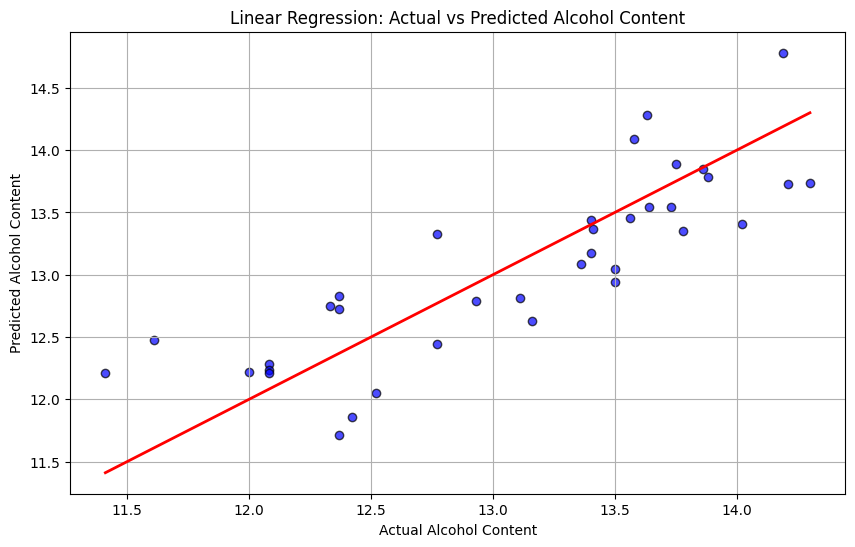

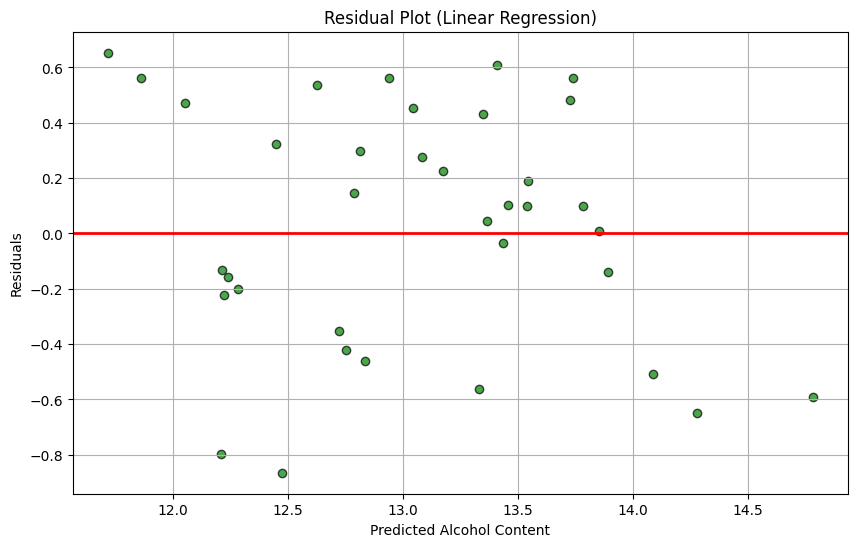

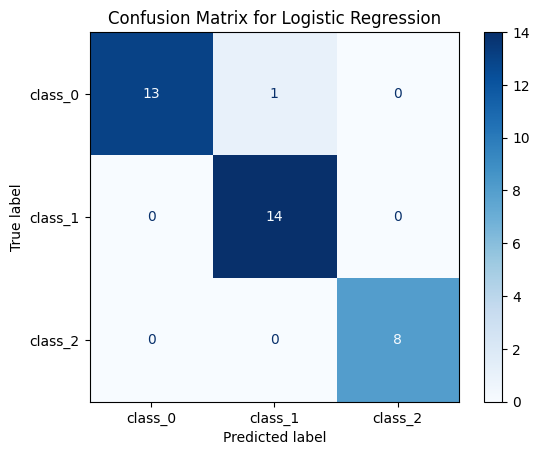

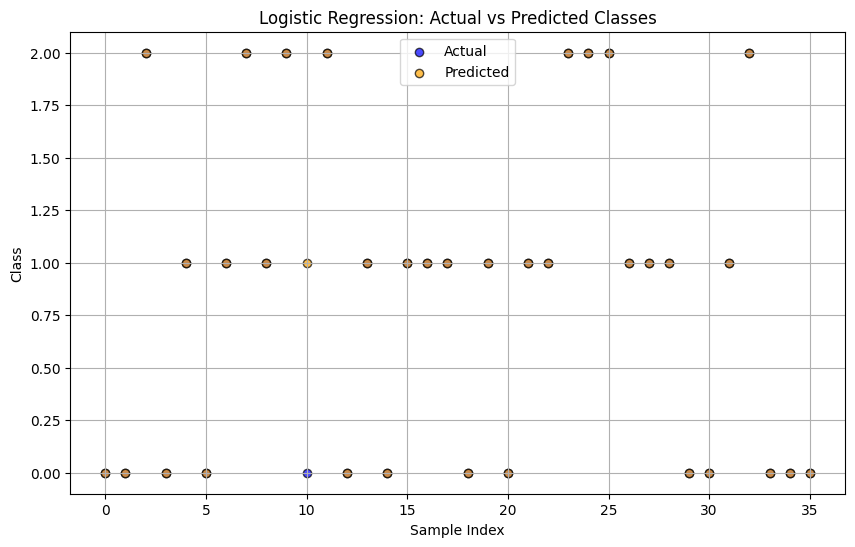

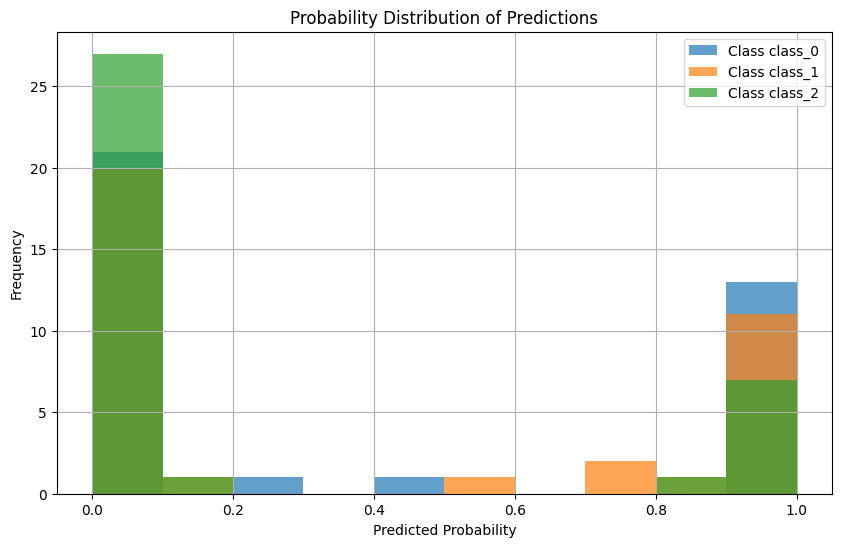

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names


X_linear = X[:, 1:]  
y_linear = X[:, 0]   


X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)


linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)
y_pred_linear = linear_model.predict(X_test_linear)


plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, color="blue", alpha=0.7, edgecolor="k")
plt.plot(
    [min(y_test_linear), max(y_test_linear)],
    [min(y_test_linear), max(y_test_linear)],
    color="red",
    linewidth=2,
)
plt.title("Linear Regression: Actual vs Predicted Alcohol Content")
plt.xlabel("Actual Alcohol Content")
plt.ylabel("Predicted Alcohol Content")
plt.grid(True)
plt.show()


residuals = y_test_linear - y_pred_linear
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, color="green", alpha=0.7, edgecolor="k")
plt.axhline(0, color="red", linewidth=2)
plt.title("Residual Plot (Linear Regression)")
plt.xlabel("Predicted Alcohol Content")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X, y, test_size=0.2, random_state=42
)


logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test_logistic)
y_proba_logistic = logistic_model.predict_proba(X_test_logistic)


cm = confusion_matrix(y_test_logistic, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(
    range(len(y_test_logistic)),
    y_test_logistic,
    color="blue",
    label="Actual",
    alpha=0.7,
    edgecolor="k",
)
plt.scatter(
    range(len(y_pred_logistic)),
    y_pred_logistic,
    color="orange",
    label="Predicted",
    alpha=0.7,
    edgecolor="k",
)
plt.title("Logistic Regression: Actual vs Predicted Classes")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for i in range(3):  
    plt.hist(
        y_proba_logistic[:, i], bins=10, alpha=0.7, label=f"Class {wine.target_names[i]}"
    )
plt.title("Probability Distribution of Predictions")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
